# Vibrações Mecânicas
## Professor Paulo Victor
## Vibrações Forçadas

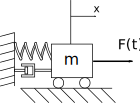

In [1]:
from IPython.core.display import SVG
import numpy as np
import matplotlib.pyplot as plt
SVG(filename='massa-mola-amortecedor-força.svg')

In [2]:
t = np.linspace(0,10,100)
F0 = 5
w = 5

In [3]:
x = 0.5 # Deslocamento inicial
v = 0 # Velocidade inicial em m/s

In [4]:
t = 0 # tempo inicial
tf = 15 # tempo final
h = 0.001 # passo de integração
n = int(tf/h) # número de pontos
zeta = 0.05 # razão de amortecimento
wn = 10 # frequência natural
w = 5 # frequência de forçameto
F0 = 5 # amplitude de forçamento

X=np.zeros(n)
V=np.zeros(n)
T=np.zeros(n)
F=np.zeros(n)

X[0]=x
V[0]=v
T[0]=t

$$ \dot{v} = -2 \zeta \omega_{n} v - \omega_{n}^{2} + F_{0}sen(\omega t) $$

In [5]:
def vp(tt,xt,vt):
    return -2*zeta*wn*vt - wn**2*xt + F0*np.sin(w*tt)

$$ \dot{x} = v $$

In [6]:
def xp(tt,xt,vt):
    return vt

In [7]:
for i in range(1,n):
    
    k1x=xp(t,x,v)
    k1v=vp(t,x,v)
    
    k2x=xp(t+h/2,x+h*k1x/2,v+h*k1v/2)
    k2v=vp(t+h/2,x+h*k1x/2,v+h*k1v/2)
    
    k3x=xp(t+h/2,x+h*k2x/2,v+h*k2v/2)
    k3v=vp(t+h/2,x+h*k2x/2,v+h*k2v/2)
    
    k4x=xp(t+h,x+h*k3x,v+h*k3v)
    k4v=vp(t+h,x+h*k3x,v+h*k3v)
    
    t=t+h
    x=x+(h/6)*(k1x+2*k2x+2*k3x+k4x)
    v=v+(h/6)*(k1v+2*k2v+2*k3v+k4v)
    
    X[i]=x
    V[i]=v
    T[i]=t

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

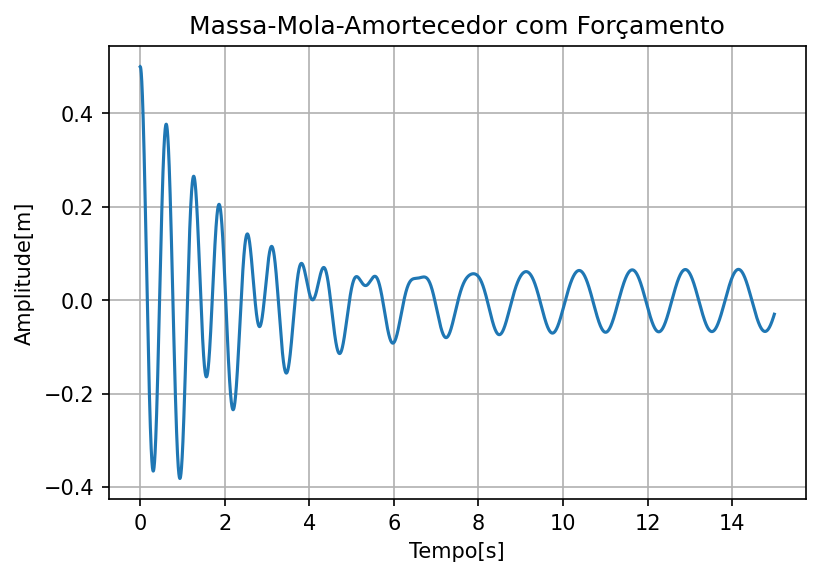

In [9]:
plt.figure()
plt.plot(T,X)
plt.title('Massa-Mola-Amortecedor com Forçamento')
plt.xlabel('Tempo[s]')
plt.ylabel('Amplitude[m]')
plt.grid(True)
plt.show()

In [10]:
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

$$  \mid H(\omega) \mid  = \dfrac{1}{\sqrt{\left[ 1 - \left( \dfrac{\omega}{\omega_{n}}\right)^{2} \right]^{2} + \left( 2 \zeta \dfrac{\omega}{\omega_{n}} \right)^2 }} $$

In [11]:
#from matplotlib import rc

#rc('font', **{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

In [12]:
def Hw(zeta):
    rw = np.linspace(0,5,50)
    H = 1/(np.sqrt((1-(rw)**2)**2 + (2*zeta*rw)**2))
    plt.plot(rw,H)
    plt.ylim(0,10)
    plt.grid(True)
    plt.xlabel(chr(969)+'/'+chr(969)+'n')
    plt.ylabel('|H(' + chr(969) + ')|')
    uns = np.linspace(1,1,50)
    plt.plot(rw,uns)

In [13]:
interact(Hw,zeta=(0.0,1.2))

interactive(children=(FloatSlider(value=0.6, description='zeta', max=1.2), Output()), _dom_classes=('widget-in…

<function __main__.Hw(zeta)>

$$ tg \phi = \dfrac{2 \zeta \dfrac{\omega}{\omega_{n}}}{1 - \left( \dfrac{\omega}{\omega_{n}}} $$

In [14]:
def Psi(zeta):
    rw = np.linspace(0,5,50)
    psi = np.arctan(2*zeta*rw/(1-rw**2))
    plt.plot(rw,psi)
    plt.ylim(-np.pi/2,np.pi/2)
    plt.grid(True)
    plt.xlabel(chr(969)+'/'+chr(969)+'n')
    plt.ylabel(chr(966))

In [15]:
interact(Psi,zeta=(0.05,1.2))

interactive(children=(FloatSlider(value=0.625, description='zeta', max=1.2, min=0.05), Output()), _dom_classes…

<function __main__.Psi(zeta)>

In [16]:
Zeta=[1, 0.5, 0.25, 0.15, 0.1, 0.05]
rw=np.linspace(0,3,100) # w/wn

In [17]:
def H(zeta):
    return 1/(np.sqrt((1 - (rw)**2)**2 + (2*zeta*rw)**2))

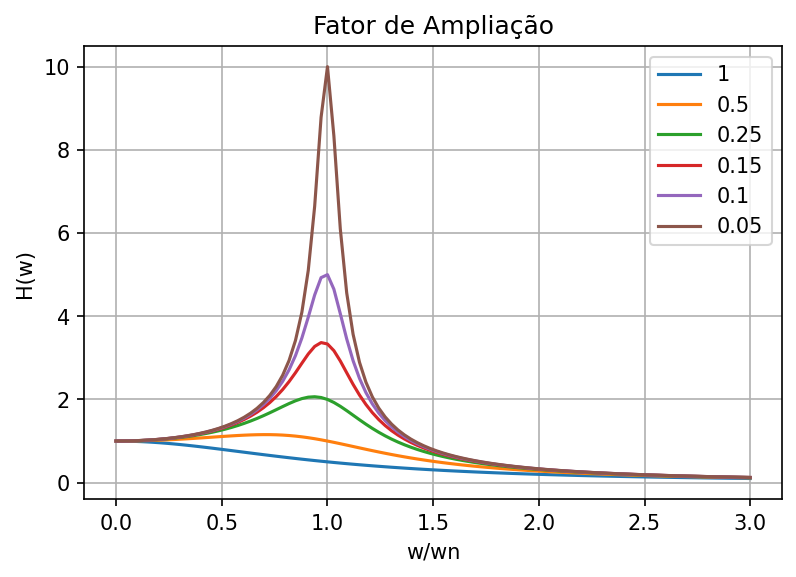

In [18]:
plt.figure()
for i in range (0,len(Zeta)):
    Hi=H(Zeta[i])
    plt.plot(rw,Hi)
plt.title('Fator de Ampliação')
plt.ylabel('H(w)')
plt.xlabel('w/wn')
plt.grid(True)
plt.legend([str(Zeta[0]),str(Zeta[1]),str(Zeta[2]),str(Zeta[3]),str(Zeta[4]),str(Zeta[5])])
plt.show()